<a href="https://colab.research.google.com/github/DamnScallion/Visionary-Unicorns-Project/blob/main/yolo/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/DamnScallion/Visionary-Unicorns-Project.git

Cloning into 'Visionary-Unicorns-Project'...
remote: Enumerating objects: 10952, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10952 (delta 2), reused 5 (delta 0), pack-reused 10941
Receiving objects: 100% (10952/10952), 85.69 MiB | 16.77 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Updating files: 100% (10835/10835), done.


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.0/608.0 kB 10.8 MB/s eta 0:00:00


In [5]:
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os

In [7]:
# ROOT_DIR = '/content/drive/My Drive/Visionary-Unicorns-Project/yolo'
ROOT_DIR = '/content/Visionary-Unicorns-Project/yolo/config'

In [8]:
# Create a new YOLO model from scratch
model = YOLO('yolov8n.yaml')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [9]:
# Train the model with original given dataset for 100 epochs
results = model.train(data=os.path.join(ROOT_DIR, 'yolo_config.yaml'), epochs=100, imgsz=224)

Ultralytics YOLOv8.0.142 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/Visionary-Unicorns-Project/yolo/config/yolo_config.yaml, epochs=100, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False,

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!scp -r /content/runs/detect/train '/content/drive/My Drive/Visionary-Unicorns-Project/runs/detect'

In [10]:
val_results = model.val()

Ultralytics YOLOv8.0.142 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients
val: Scanning /content/Visionary-Unicorns-Project/yolo/data-yolo-format/original/labels/valid.cache... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]
                   all         72         72      0.895      0.833      0.915      0.672
               penguin         72         36      0.944      0.889       0.94      0.707
                turtle         72         36      0.846      0.778       0.89      0.637
Speed: 1.2ms preprocess, 8.7ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val


In [11]:
# load the model just trained
trained_model = YOLO('./runs/detect/train/weights/best.pt')

In [12]:
# Validate the model
metrics = trained_model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.142 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients
val: Scanning /content/Visionary-Unicorns-Project/yolo/data-yolo-format/original/labels/valid.cache... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.01it/s]
                   all         72         72      0.895      0.833      0.915      0.672
               penguin         72         36      0.944      0.889       0.94      0.707
                turtle         72         36      0.846      0.778       0.89      0.637
Speed: 0.8ms preprocess, 2.0ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val2


array([    0.70697,     0.63687])

In [13]:
metrics.box.map

0.6719209811964151

In [14]:
metrics.box.map50

0.915066649272156

In [15]:
metrics.box.map75

0.7805055345073613

In [16]:
metrics.box.maps

array([    0.70697,     0.63687])

In [17]:
import cv2
from google.colab.patches import cv2_imshow
import math

In [ ]:
# trained_model = YOLO(os.path.join(ROOT_DIR, 'runs/detect/train/weights/best.pt'))

In [18]:
# Function to perform object detection
def detection(img_path, model):
  # Load image
  img = cv2.imread(img_path)

  # Perform object detection
  results = model.predict(source = img)

  # print(f'results = {results}')

  # Extract bounding boxes
  boxes = results[0].boxes
  print(f'boxes length = {len(boxes)}')

  bounding_boxes = []

  for box in boxes:
    left, top, right, bottom = box.xyxy[0]
    # left, top, right, bottom = int(left), int(top), int(right), int(bottom)
    left, top, right, bottom = int(math.ceil(left)), int(math.ceil(top)), int(math.ceil(right)), int(math.ceil(bottom))
    print(left, top, right, bottom)
    print(f'box = {box}')

    cls_id = int(list(box.cls)[0])

    print(f'cls_id = {cls_id}')

    bounding_boxes.append((left, top, right, bottom))

  return bounding_boxes

In [20]:
# VAL_DIR = '/content/drive/My Drive/Visionary-Unicorns-Project'
VAL_DIR = '/content/Visionary-Unicorns-Project'


0: 224x224 1 penguin, 9.1ms
Speed: 1.0ms preprocess, 9.1ms inference, 3.3ms postprocess per image at shape (1, 3, 224, 224)
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


boxes length = 1
378 243 561 549
box = ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[377.4301, 242.2011, 560.0421, 548.9249,   0.9496,   0.0000]], device='cuda:0')
cls: tensor([0.], device='cuda:0')
conf: tensor([0.9496], device='cuda:0')
data: tensor([[377.4301, 242.2011, 560.0421, 548.9249,   0.9496,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[468.7361, 395.5630, 182.6120, 306.7238]], device='cuda:0')
xywhn: tensor([[0.7324, 0.6181, 0.2853, 0.4793]], device='cuda:0')
xyxy: tensor([[377.4301, 242.2011, 560.0421, 548.9249]], device='cuda:0')
xyxyn: tensor([[0.5897, 0.3784, 0.8751, 0.8577]], device='cuda:0')
cls_id = 0


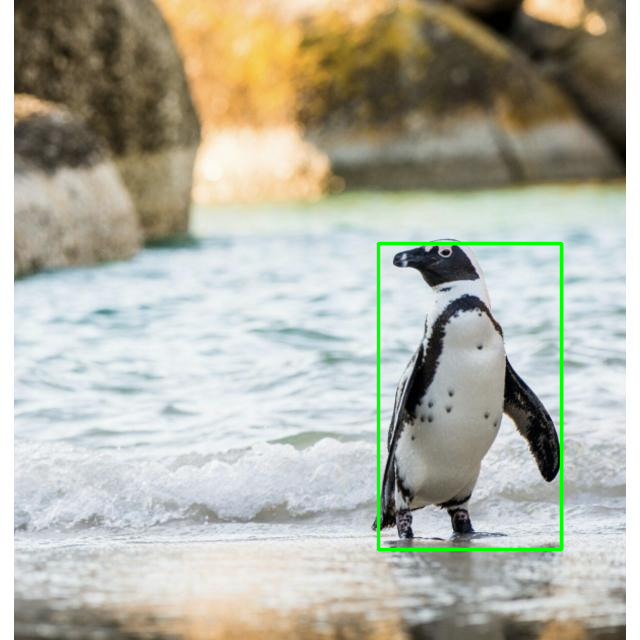

In [21]:
# Example usage
image_path = os.path.join(VAL_DIR, 'data/original/valid/image_id_008.jpg')

image = cv2.imread(image_path)

bounding_boxes = detection(image_path, model)

# Draw bounding boxes on the image
for (left, top, right, bottom) in bounding_boxes:
    start_point = (left, top)
    end_point = (right, bottom)
    color = (0, 255, 0)
    thickness = 2
    lineType = cv2.LINE_AA
    cv2.rectangle(image, start_point, end_point, color, thickness, lineType)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
!git clone https://github.com/DamnScallion/Visionary-Unicorns-Data.git

Cloning into 'Visionary-Unicorns-Data'...
remote: Enumerating objects: 582, done.
remote: Counting objects: 100% (582/582), done.
remote: Compressing objects: 100% (581/581), done.
remote: Total 582 (delta 1), reused 579 (delta 1), pack-reused 0
Receiving objects: 100% (582/582), 20.56 MiB | 34.91 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the first image and its corresponding bounding box
image_path = '/content/Visionary-Unicorns-Data/data/train/image_id_005.jpg'
image = cv2.imread(image_path)
train_file = '/content/Visionary-Unicorns-Data/data/train_annotations'
with open(train_file, 'r') as f:
    data = f.read()
annotation = pd.DataFrame(eval(data))
column_order = ["id", "image_id", "category_id", "bbox", "area", "segmentation", "iscrowd"]
annotation = annotation[column_order]
annotation_bboxes = annotation['bbox'].tolist()
bbox = annotation_bboxes[5]

In [ ]:
# Convert the bounding box to imgaug BoundingBoxesOnImage format
x1 = int(bbox[0])
y1 = int(bbox[1])
x2 = int(bbox[0]) + int(bbox[2])
y2 = int(bbox[1]) + int(bbox[3])
bounding_boxes = [BoundingBox(x1, y1, x2, y2)]

# Create an Augmenter object with desired augmentation techniques
augmenter = iaa.Sequential([
    iaa.Affine(
        rotate=(-10, 10),
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        shear=(-0.2, 0.2),
        scale=(0.8, 1.2)
    ),
    iaa.Fliplr(0.5),
])

# Convert image to imgaug format
image_aug = ia.imresize_single_image(image, (image.shape[1], image.shape[0]))

# Convert bounding boxes to imgaug format
bbs_aug = BoundingBoxesOnImage(bounding_boxes, shape=image.shape)

# Apply augmentation
image_aug, bbs_aug = augmenter(image=image_aug, bounding_boxes=bbs_aug)

print(f'bbs_aug = {bbs_aug}')

# Convert bounding boxes back to [x_min, y_min, x_max, y_max] format
augmented_bbox = bbs_aug.to_xyxy_array()[0]
augmented_bbox = list(augmented_bbox)

bbs_aug = BoundingBoxesOnImage([BoundingBox(x1=98.7359, y1=-25.2772, x2=588.4598, y2=485.5183, label=None)], shape=(640, 640, 3))


In [ ]:
augmented_bbox

[98.73588, -25.277174, 588.4598, 485.5183]

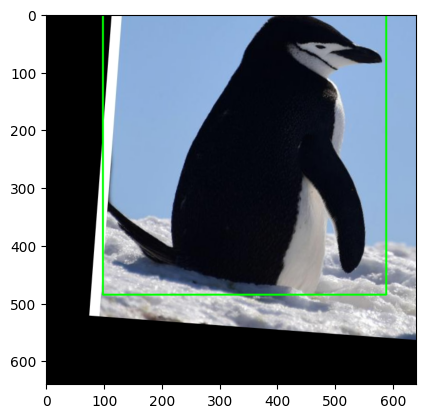

In [ ]:
x1, y1, x2, y2 = augmented_bbox
x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

start_point = (x1, y1)
end_point = (x2, y2)
color = (0, 255, 0)
thickness = 2
lineType = cv2.LINE_AA
cv2.rectangle(image_aug, start_point, end_point, color, thickness, lineType)

plt.imshow(cv2.cvtColor(image_aug, cv2.COLOR_BGR2RGB))